In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import train_test_split

In [166]:
#we are loading the data from 01/01/2015 to 26/09/2021
btc_hist = pd.read_csv('./BTC-USD.csv', index_col='Date')

In [167]:
#There are some missing values

btc_hist[btc_hist.isna().any(axis=1)]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-04-17,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-09,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-12,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-13,NaN,NaN,NaN,NaN,NaN,NaN


In [168]:
#We add the missing data manually (these values come from coinmarketcap.com)
#then we create a copy of the data so as not to change the original

btc_hist_m=btc_hist.copy()

btc_hist_m.loc['2020-10-13']=[11548.72, 11548.98, 11321.22,
        11425.90, 11425.90, 24241420251.0]
btc_hist_m.loc['2020-10-12']=[11392.64, 11698.47, 11240.69,
        11555.36, 11555.36, 26163972642.0]
btc_hist_m.loc['2020-10-09']=[10927.91, 11102.67, 10846.85,
        11064.46, 11064.46, 22799117613.0]
btc_hist_m.loc['2020-04-17']=[7116.55, 7167.18, 7050.33,
        7096.18, 7096.18, 32513423567.0]

btc_hist_m[btc_hist_m.isna().any(axis=1)]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [169]:
#We change the column Date to a date format
btc_hist_m.index=pd.to_datetime(arg=btc_hist_m.index,format='%Y-%m-%d')

In [170]:
#Erasing unnecesary columns
btc_hist_m = btc_hist_m.drop(labels=['Open','High','Low','Adj Close'], axis=1)

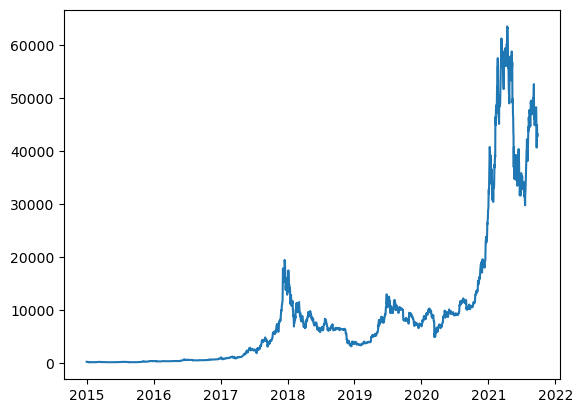

In [171]:
#Let's take a look at the data
plt.plot(btc_hist_m.index, btc_hist_m['Close'])

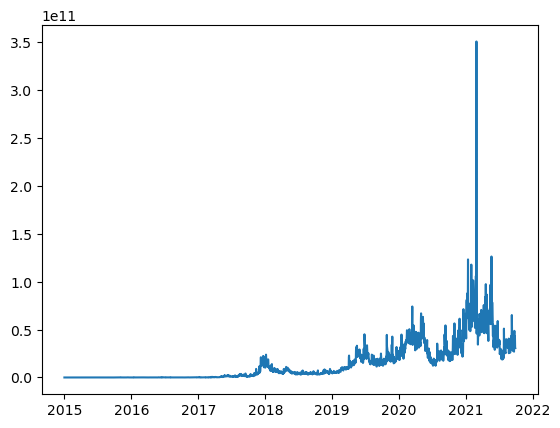

In [172]:
#Let's take a look at the data
plt.plot(btc_hist_m.index, btc_hist_m['Volume'])

In [173]:
btc_hist_m_close = btc_hist_m.drop(labels=['Volume'], axis=1)

In [74]:
final = seasonal_decompose(btc_hist_m_close,model='multiplicative')

<AxesSubplot:xlabel='Date'>

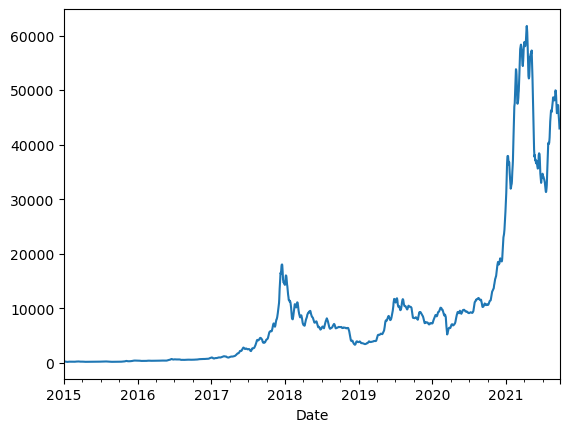

In [88]:
final.trend.plot()

<AxesSubplot:xlabel='Date'>

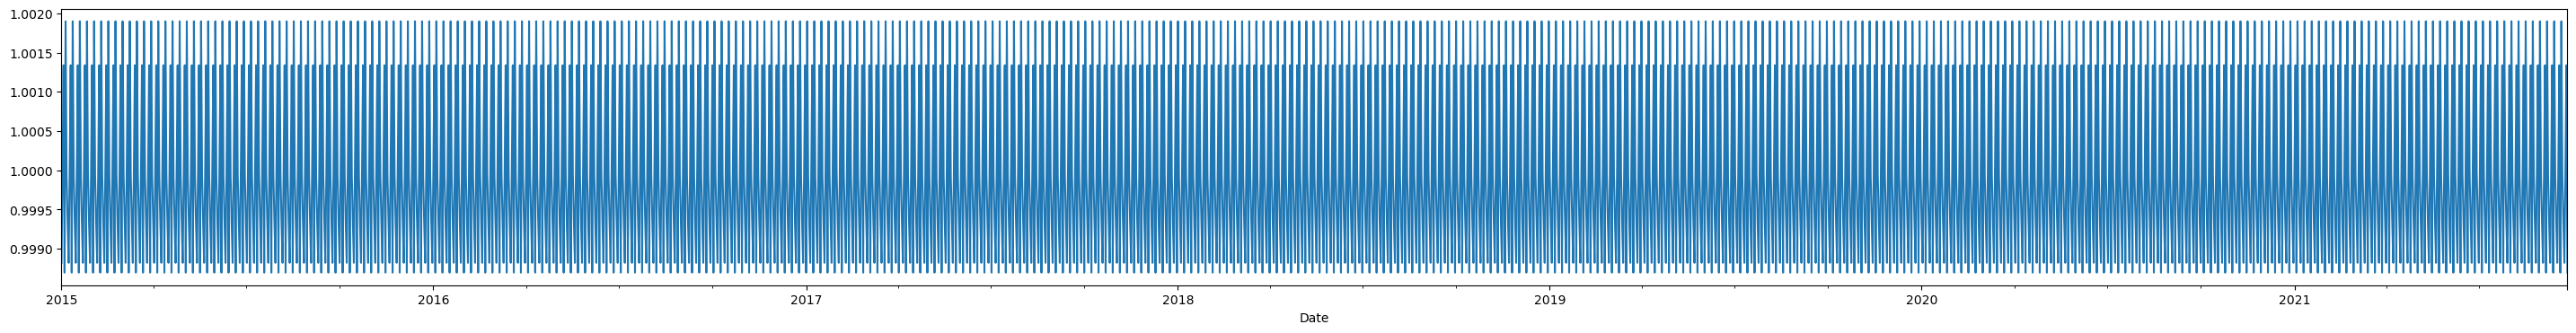

In [91]:
final.seasonal.plot(figsize=(36,4))

<AxesSubplot:xlabel='Date'>

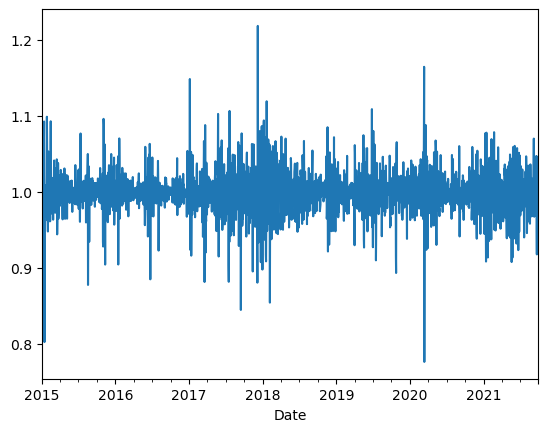

In [92]:
final.resid.plot()

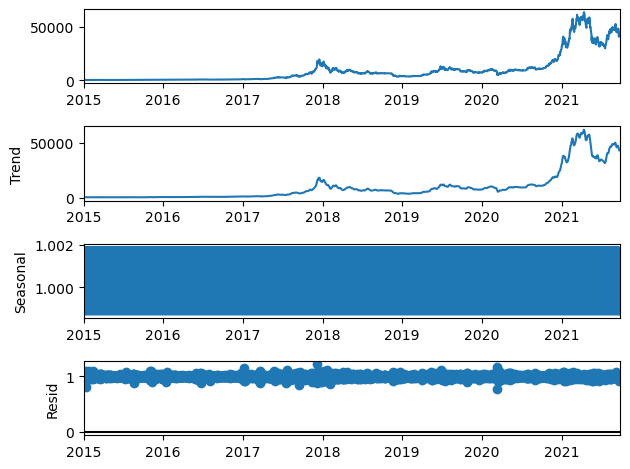

In [93]:
fig = final.plot()

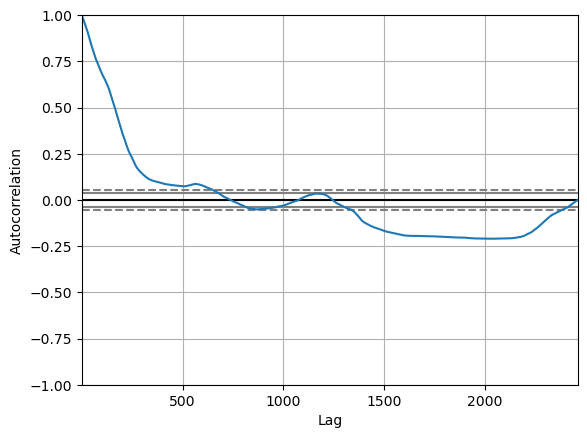

In [94]:
autocorrelation_plot(btc_hist_m_close)
plt.show()

In [80]:
result = adfuller(btc_hist_m_close.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -0.554717
p-value: 0.880890


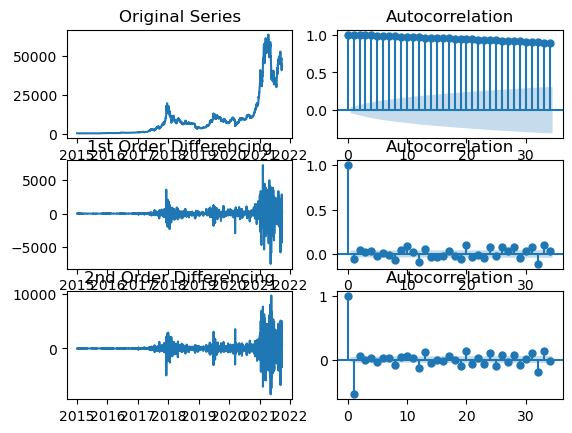

In [95]:

# Original Series
fig, axes = plt.subplots(3, 2)
axes[0, 0].plot(btc_hist_m_close); axes[0, 0].set_title('Original Series')
plot_acf(btc_hist_m_close, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(btc_hist_m_close.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(btc_hist_m_close.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(btc_hist_m_close.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(btc_hist_m_close.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

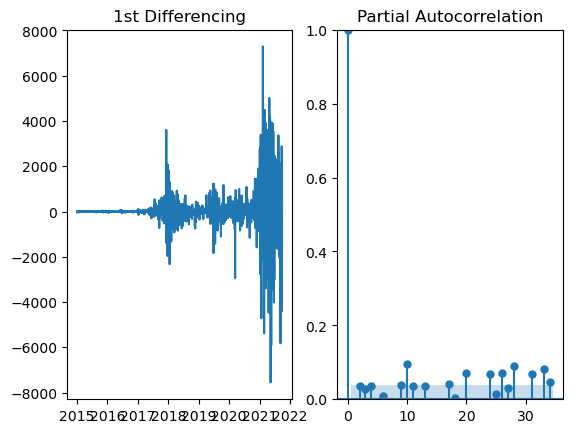

In [100]:
# PACF plot of 1st differenced series

fig, axes = plt.subplots(1, 2)
axes[0].plot(btc_hist_m_close.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1))
plot_pacf(btc_hist_m_close.diff().dropna(), ax=axes[1])

plt.show()

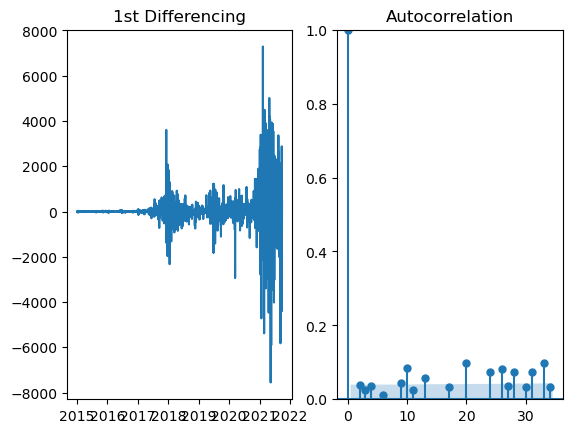

In [103]:
fig, axes = plt.subplots(1, 2)
axes[0].plot(btc_hist_m_close.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1))
plot_acf(btc_hist_m_close.diff().dropna(), ax=axes[1])

plt.show()

C:\APS\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\APS\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\APS\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\APS\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2461
Model:                ARIMA(9, 1, 10)   Log Likelihood              -19534.112
Date:                Tue, 30 Nov 2021   AIC                          39108.224
Time:                        13:19:35   BIC                          39224.382
Sample:                    01-01-2015   HQIC                         39150.429
                         - 09-26-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0476      0.107     -0.446      0.656      -0.257       0.162
ar.L2         -0.0703      0.084     -0.833      0.405      -0.236       0.095
ar.L3         -0.2835      0.081     -3.497      0.0

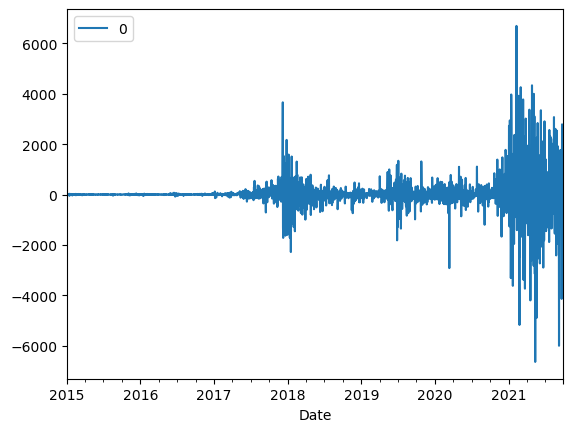

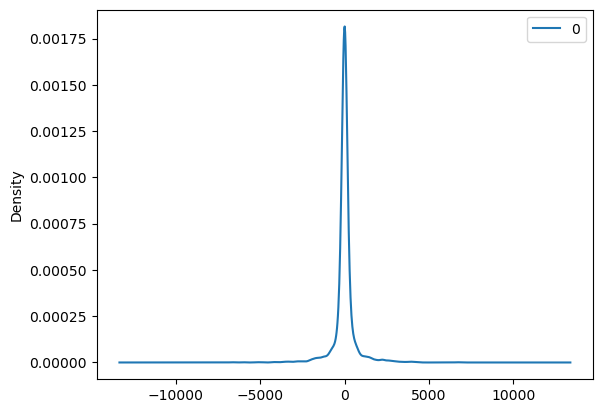

                 0
count  2461.000000
mean     15.712212
std     679.050849
min   -6648.048207
25%     -51.569631
50%       2.046220
75%      82.465693
max    6695.347996


In [119]:
# fit model
model = ARIMA(btc_hist_m_close, order=(9,1,10))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

In [174]:
# Create Training and Test
train, test = train_test_split(btc_hist_m_close, shuffle=False, test_size=0.2)

In [175]:
test.size

493

C:\APS\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\APS\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\APS\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\APS\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


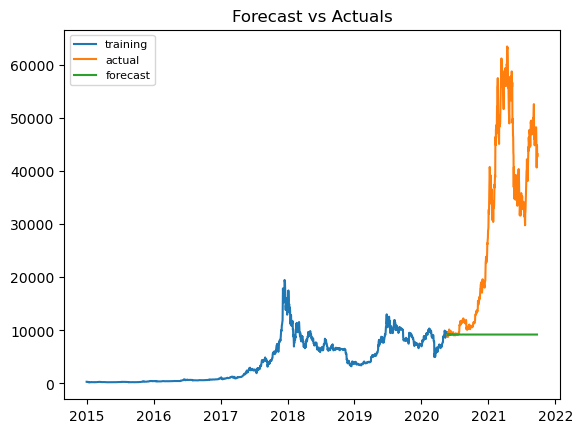

In [142]:
# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(9, 1, 10))  
fitted = model.fit()  

# Forecast
fc = fitted.forecast(490, alpha=0.05)  # 95% conf


# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
#lower_series = pd.Series(conf[:, 0], index=test.index)
#upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
#plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
#plt.fill_between(lower_series.index, lower_series, upper_series, 
#                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [176]:
import warnings
warnings.filterwarnings(action='once')

In [177]:
history = train
predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(9,1,10))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test.iloc[t]
    history=history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

C:\APS\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\APS\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\APS\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\APS\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible star

predicted=9144.135375, expected=9182.577148
predicted=9259.855536, expected=9209.287109
predicted=9269.414042, expected=8790.368164
predicted=8767.133272, expected=8906.934570
predicted=8886.324120, expected=8835.052734
predicted=8912.626235, expected=9181.017578
predicted=9220.098981, expected=9525.750977
predicted=9367.823307, expected=9439.124023
predicted=9417.348876, expected=9700.414063
predicted=9656.385906, expected=9461.058594
predicted=9492.079149, expected=10167.268555
predicted=10307.756674, expected=9529.803711
predicted=9420.951631, expected=9656.717773
predicted=9677.201545, expected=9800.636719
predicted=9800.551761, expected=9665.533203
predicted=9782.608412, expected=9653.679688
predicted=9610.567092, expected=9758.852539
predicted=9720.132293, expected=9771.489258
predicted=9816.339130, expected=9795.700195
predicted=9689.931820, expected=9870.094727
predicted=10064.237458, expected=9321.781250
predicted=9195.239234, expected=9480.843750
predicted=9493.917270, expect

KeyboardInterrupt: 